In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ast


In [3]:
dataset_path_1 = 'tmdb_5000_movie.csv'


df_1 = pd.read_csv(dataset_path_1)


print(df_1.columns)


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [4]:
dataset_path_2 = 'tmdb_5000_credits.csv'

df_2 = pd.read_csv(dataset_path_2)


print(df_2.columns)

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [5]:
import pandas as pd


#  if title  is a common column 
if 'title' in df_1.columns and 'title' in df_2.columns:
    # Merge 
    merged_df = pd.merge(df_1, df_2, on='title', how='inner')

print (merged_df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')


In [6]:
# Check for missing values
missing_values = merged_df.isnull().sum()
# so .....
merged_df = merged_df.drop(columns=['homepage'])
merged_df = merged_df.dropna(subset=['overview'])
most_common_release_date = merged_df['release_date'].mode()[0]
merged_df['release_date'].fillna(most_common_release_date, inplace=True)
median_runtime = merged_df['runtime'].median()
merged_df['runtime'].fillna(median_runtime, inplace=True)
merged_df = merged_df.drop(columns=['tagline'])


In [7]:
merged_df = merged_df.drop_duplicates()


In [8]:
#  One-hot encode genres & spoken languages
merged_df = pd.get_dummies(merged_df, columns=['genres'], prefix='genre')
merged_df = pd.get_dummies(merged_df, columns=['spoken_languages'], prefix='language')

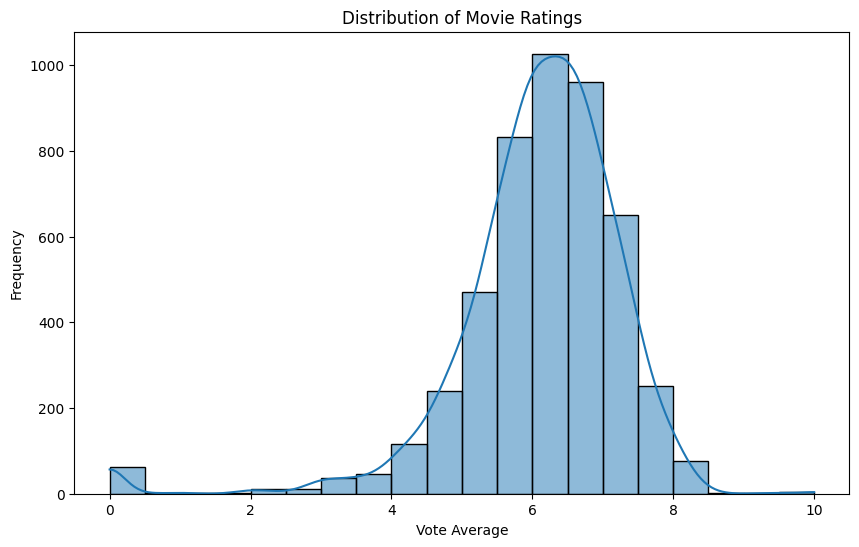

In [9]:

# Plot a histogram 
plt.figure(figsize=(10, 6))
sns.histplot(data=merged_df, x='vote_average', bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()


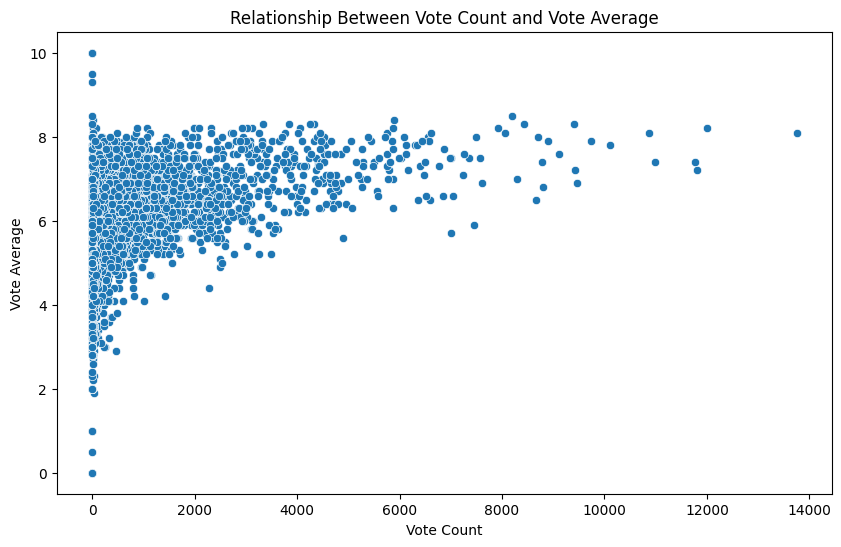

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='vote_count', y='vote_average')
plt.title('Relationship Between Vote Count and Vote Average')
plt.xlabel('Vote Count')
plt.ylabel('Vote Average')
plt.show()
